# Normalizacija
Cilj normalizacije je transformacija atributa da budu na sličnim skalama. 

Četiri korisne tehnike normalizacije:
* Skaliranje na određeni raspon
* Odsecanje
* Log skaliranje
* Z-score

Prikaz ovih tehnika će biti nad skupom podataka [1985 Ward's Automotive Yearbook]("https://archive.ics.uci.edu/ml/datasets/Automobile") koji se nalazi na UCI Machine Learning Repository.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Ucitavanje skupa
car # = CODE HERE 
car.shape

(205, 26)

In [ ]:
# Fokusiraćemo se na atribut price
car['price'].describe()

count     205
unique    187
top         ?
freq        4
Name: price, dtype: object

In [ ]:
# Imamo nedostajuće vrednosti, vidimo i da nije numericki tip
# CODE HERE

In [ ]:
# Pošto ćemo imati više sličnih plotova
def plot_hist(X, title):
  plt.title(title)
  X.hist(bins=45)
  plt.xlabel('cena')

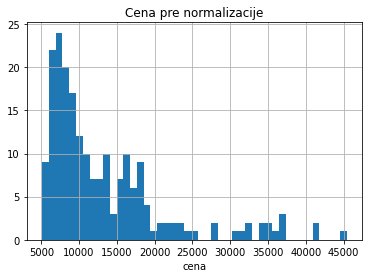

In [ ]:
# Plotovati histogram pre normalizacije
plot_hist(car['price'], "Cena pre normalizacije")

## MinMax scaler

Transformisemo vrednosti atributa iz prirodnog raspona [min, max], na raspon [0, 1].

Formula:

  $x^{'} = \frac{x-min}{max-min}$


Pogodan za korišćenje:

* Ako približno znamo gornje i donje ograničenje.
* Ako podaci sadrže malo (ili ne sadrže) autlajere.
* Ako su podaci približno uniformno distribuirani na rasponu.

Primer kada bi ovaj tip normalizacije bio dobar: godine.
Primer kada bi ovaj tip normalizacije bio loš: godišnja primanja.


In [ ]:
def minmax(X):
  #CODE HERE
  pass

In [ ]:
car_mm = minmax(car['price'])
plot_hist(car_mm, "Cena nakon minmax normalizacije")

## Odsecanje

Ako podaci imaju ekstremne autlajere možemo koristiti odsecanje. Tada se sve vrednosti manje od minimalne zadate slikaju u min. Analogno važi za max.

Formula:

$clipping(x, min, max) = \left\{ 
  \begin{array}{ c l }
    min & x < min \\
    max & x > max \\
    \frac{x-min}{max-min} & inace
  \end{array}
\right.$

Može se primeniti pre i posle drugih vrsta normalizacije.


In [ ]:
def clipping(X, min, max):
  # CODE HERE
  pass

In [ ]:
car_clip = clipping(car['price'], 5000, 40000)
plot_hist(car_clip, "Cena nakon odsecanja")

## Logaritamsko skaliranje

$x^{'} = log(x)$

Logaritamsko skaliranje je korisno ukoliko ukoliko imamo raspodelu verovatnoće stepenog zakona (Paretova raspodela).

Intuitivno: ako imamo malo tacaka sa velikim vrednostima i dosta tacaka sa malim vrednostima. Npr: raspodela bogatstva u društvu, filmske recenzije.

Iz tog razloga koristimo logaritam, da smanjimo razliku između vrednosti.


In [ ]:
def log(X):
  # CODE HERE
  pass

In [ ]:
car_log = log(car['price'])
plot_hist(car_log, "Cena nakon logaritamskog skaliranja")

## Z-score (standardizacija)

Z-score predstavlja koliko standardinh devijacija je vrednost udaljena od srednje vrednosti. 


Koristimo kada želimo da osiguramo da je mean = 0  i std = 1.
Korisno ako imamo outlajere, ali ne ekstremne da nam treba odsecanje

Formula:
  
  $x^{'} = \frac{x- μ}{σ}$




In [ ]:
def z_score(X):
  # CODE HERE
  pass

In [ ]:
car_z = z_score(car['price'])
plot_hist(car_z, "Cena nakon standardizacije")

Rezime:


In [ ]:
plots = [car['price'], car_mm, car_clip, car_log, car_z]
plot_titles = ["Bez", "MinMax", "Odsecanje", "Log", "Standardizacija"]

plt.figure(figsize=(20, 5))

for i in range(len(plots)):
  plt.subplot(1, 5, i+1)
  plot_hist(plots[i], plot_titles[i])
